<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW6/SNdataLineFit_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Objective: fit supernova cosmology data : the linear relationship between logarithm redshift and luminosity of supernovae is evidence of the expansion of the Universe. In this homework you will fit the supernova data with a line, in the next class we will discover evidence of the *accelerated* expansion of the Universe

In [3]:
from __future__ import division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import optimize

%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [0]:
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Get the data

Download the data used in the Betoule 2014 paper https://arxiv.org/abs/1401.4064. The data can be obtained here 
http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html

As it says on the webpage: "The JLA C++ code and data are available from a single archive: jla_likelihood_v6.tgz". 
Download it and unpack it within the notebook (mounting your drive on colab etc) and move the data to the folder /drive/My Drive/dsps/data

The input data file is named jla_lcparams.txt


In [5]:
#delete
!mkdir -p dsps/data

!wget http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz
!tar -xvf jla_likelihood_v6.tgz


--2019-10-25 23:17:18--  http://supernovae.in2p3.fr/sdss_snls_jla/jla_likelihood_v6.tgz
Resolving supernovae.in2p3.fr (supernovae.in2p3.fr)... 134.158.152.153
Connecting to supernovae.in2p3.fr (supernovae.in2p3.fr)|134.158.152.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23716633 (23M) [application/x-gzip]
Saving to: ‘jla_likelihood_v6.tgz’

jla_likelihood_v6.t 100%[===================>]  22.62M  5.90MB/s    in 5.3s    

2019-10-25 23:17:23 (4.27 MB/s) - ‘jla_likelihood_v6.tgz’ saved [23716633/23716633]

jla_likelihood_v6/src/ini.o
jla_likelihood_v6/src/ini.h
jla_likelihood_v6/src/jla.cc
jla_likelihood_v6/src/ini.c
jla_likelihood_v6/src/jla.o
jla_likelihood_v6/src/test.cc
jla_likelihood_v6/src/jla.h
jla_likelihood_v6/src/test.o
jla_likelihood_v6/makefile
jla_likelihood_v6/data/jla_v0b_covmatrix.dat
jla_likelihood_v6/data/jla_mub_covmatrix.dat
jla_likelihood_v6/data/jla_v0_covmatrix.dat
jla_likelihood_v6/data/jla_mub.txt~
jla_likelihood_v6/data/jla_vab_co

In [0]:
#delete
!mv jla_likelihood_v6 dsps/data

In [0]:
jla = pd.read_csv("dsps/data/jla_likelihood_v6/data/jla_lcparams.txt", sep=" ")

In [8]:
jla.head()

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.503084,0.5043,0,23.001698,0.088031,1.273191,0.150058,-0.012353,0.030011,9.517,0.1105,52909.745220,0.214332,0.000790,0.000440,-0.000030,1,36.043210,-4.037469,0.001697
1,03D1aw,0.580724,0.5820,0,23.573937,0.090132,0.974346,0.273823,-0.025076,0.036691,9.169,0.0880,52902.898002,0.352732,0.002823,0.000415,0.001574,1,36.061634,-4.517158,0.000843
2,03D1ax,0.494795,0.4960,0,22.960139,0.088110,-0.728837,0.102069,-0.099683,0.030305,11.580,0.1125,52915.923670,0.111634,0.000542,0.000475,-0.000024,1,36.097287,-4.720774,0.001692
3,03D1bp,0.345928,0.3470,0,22.398137,0.087263,-1.155110,0.112834,-0.040581,0.026679,10.821,0.1235,52920.249015,0.102828,0.001114,0.000616,0.000295,1,36.657235,-4.838779,-0.000270
4,03D1co,0.677662,0.6790,0,24.078115,0.098356,0.618820,0.404295,-0.039380,0.067403,8.647,0.2840,52954.458342,0.454715,0.011857,0.000780,0.005898,1,36.567748,-4.935050,-0.002855


In [9]:
jla.describe()

,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
count,740.000000,740.000000,740.0,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.323804,0.324449,0.0,20.904956,0.115913,0.036599,0.311099,-0.023862,0.038897,9.795341,0.827140,53527.309187,0.382252,0.006210,0.000645,0.002665,1.860811,93.551713,5.726200,-0.004195
std,0.276869,0.276748,0.0,2.655143,0.018761,0.988559,0.211398,0.084112,0.015706,1.395068,3.369119,1023.254711,0.299172,0.010127,0.000947,0.005317,0.715821,119.504602,22.728815,0.006796
min,0.010060,0.009370,0.0,14.148421,0.085341,-2.862959,0.017738,-0.250149,0.011882,5.000000,0.004500,48076.401017,0.021321,-0.044995,-0.004558,-0.011397,1.000000,-55.207462,-66.485085,-0.036389
25%,0.124240,0.124418,0.0,19.735791,0.101604,-0.650131,0.148408,-0.084578,0.026015,9.316750,0.106875,53360.155972,0.164968,0.000646,0.000440,0.000061,1.000000,4.812357,-1.037904,-0.008439
50%,0.229045,0.230515,0.0,21.098947,0.114480,0.165391,0.267931,-0.030434,0.034759,10.193500,0.182750,53685.973783,0.307975,0.003097,0.000630,0.000919,2.000000,36.667567,0.237261,-0.001083
75%,0.498216,0.499000,0.0,23.043200,0.124173,0.775606,0.420354,0.030961,0.049647,10.710250,0.290500,54041.338277,0.509950,0.008213,0.000971,0.003591,2.000000,190.881058,2.146795,-0.000380
max,1.299106,1.300000,0.0,26.046776,0.174566,2.337170,1.641345,0.259538,0.106505,11.817000,54.194000,54555.109466,2.336975,0.069409,0.008604,0.053578,4.000000,359.635090,79.031740,0.002649


In [10]:
jla.columns

Index(['#name', 'zcmb', 'zhel', 'dz', 'mb', 'dmb', 'x1', 'dx1', 'color',
       'dcolor', '3rdvar', 'd3rdvar', 'tmax', 'dtmax', 'cov_m_s', 'cov_m_c',
       'cov_s_c', 'set', 'ra', 'dec', 'biascor'],
      dtype='object')

Use pandas scatter matrix to see the relationship between variables (Lab6). If you look in HW5 you can see how to rotate the labels

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


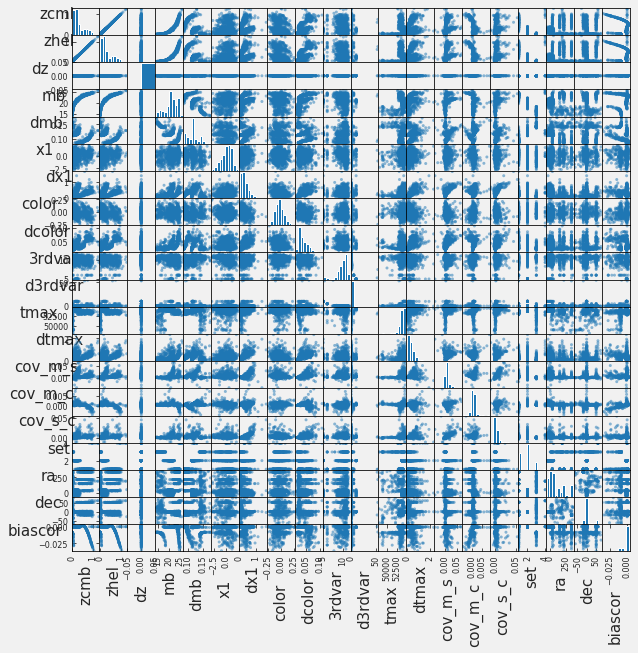

In [11]:
#delete
axs = pd.plotting.scatter_matrix(jla, figsize=(10,10));
for x in range(len(axs)):
    for y in range(len(axs)):
        if x == len(axs) - 1:
            #to make x axis name vertical  
            axs[x, y].xaxis.label.set_rotation(90)
        if y == 0:    
            axs[x, y].yaxis.label.set_rotation(0);


Figure 0: scatter matrix of all variables in the JLA combined supernova dataset from Betoule+ 2014. Obvious linear relationships are seen between the redshift measured with different techniques, but that is expected. A promising power lar relationship is seen between magniture and redshift features.

The target variables for our analysis are redshift and brightness: "zcmb" and "mb". This an exercise about fitting lines to data. Why does it lot look like there is a line relationship between them? How can does the relationship look? Plot the "zcmb" vs "mb". Include the y uncertainty which is reported in "dmb". Plot each data point with a different color based on the survey it comes from. The survey data is indicated by the variable "set". To do it you can use the dataframe plotting methods (```df.plot.scatter()```), ```pylab.scatter()```, or ```pylab.plot()``` asking to plot the data as point ('.') but for each the way you relate the color to a column value is a bit different. Stackoverflow is your friend!

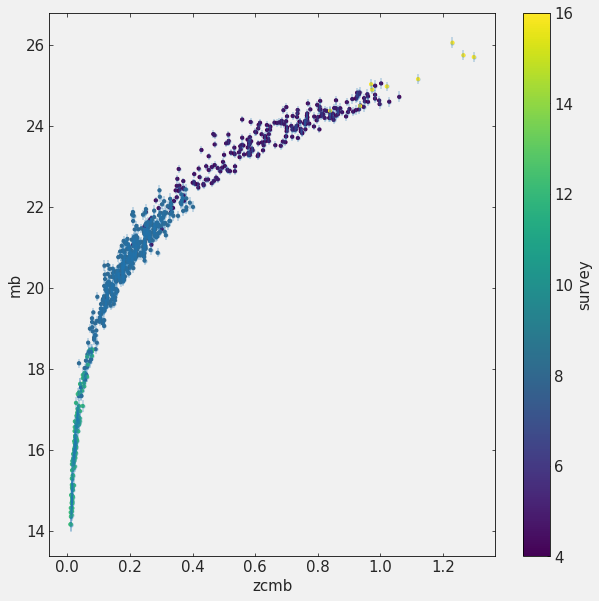

In [132]:
#delete leave plot
ax = jla.plot.scatter(x="zcmb", y="mb", yerr="dmb", 
         s=10, figsize=(10,10), alpha=0.3);
b

Figure 1: JLA supernova data: each supernova is shown in a magnitude-reshift space with uncertainties on the magnitude measurement, and colorcoded by the survey that measured it.

It is a **power law**, which means it will be linear in logarithmic space - specifically in logx vs natural y space
Replot the data with natural y axis and logarithmic x axis, you can do that by taking the log of the data and then plotting it or by using plot functionalities (e.g. for ```df.plot.scatter()``` you can use ```logx=True```)

Note that when we talk about log we (generally) talk about log base 10! 


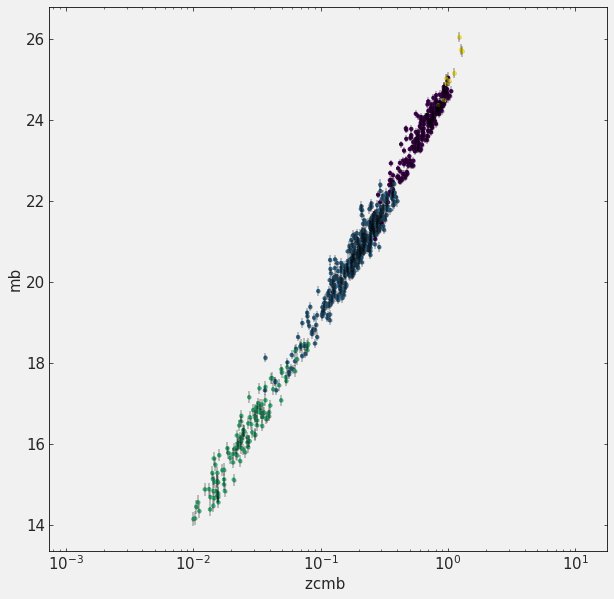

In [136]:
#delete leave plot
ax = jla.plot.scatter(x="zcmb", y="mb", yerr="dmb", logx=True, 
         s=10, c='k', figsize=(10,10), alpha=0.3);
ax = jla.plot.scatter(x="zcmb", y="mb",logx=True, 
         s=10, c=jla.set, cmap='viridis', figsize=(10,10), ax=ax, colorbar=False);
ax.set_xlabel("zcmb ");


Figure 2: Same as Figure 1 in a logx-y space: the supernoga magnitude-log redshift shows a promising linear trend

# Fit a line to the data with scipy

Like we did in class: fit a line using ```scipy.optimize``` (lab 5). Do it with and without including the uncertainties on your data (the curvefit parameter to include uncertainties in the exogenous variable is ```sigma```). Report the variace and the covariance by printing your uncertainties explicitly:





In [17]:
#delete
def line(x, a, b):
    """
    Takes two parameters (a and b) along with an array of x values. Returns y array.
    """
  
    return a * x + b

popt0, pcov0 = sp.optimize.curve_fit(line, np.log10(jla.zcmb), jla.mb, p0=[5, 0])
print("fit parameters", popt0, "\n", 
      "covariance matrix\n", pcov0)

fit parameters [ 5.37205483 24.65623053] 
 covariance matrix
 [[0.00049493 0.00034561]
 [0.00034561 0.00036056]]


In [68]:
#delete
print ("line model - no uncertainties")

print("slope = {:.2} +/- {:.2}".format(popt0[0], np.sqrt(pcov0[0,0])))
print("intercept = {:.2} +/- {:.2}".format(popt0[1], np.sqrt(pcov0[1,1])))
print("parameters covariance = {:.2}".format(pcov0[1,0]))

line model - no uncertainties
slope = 5.4 +/- 0.022
intercept = 2.5e+01 +/- 0.019
parameters covariance = 0.00035


In [0]:
#delete
sorter = np.argsort(jla.zcmb)


plot the data like you did above and the model you just created including the uncertainty band (look at lab5: there is a mistake we made in class which I corrected in the version I uploaded)

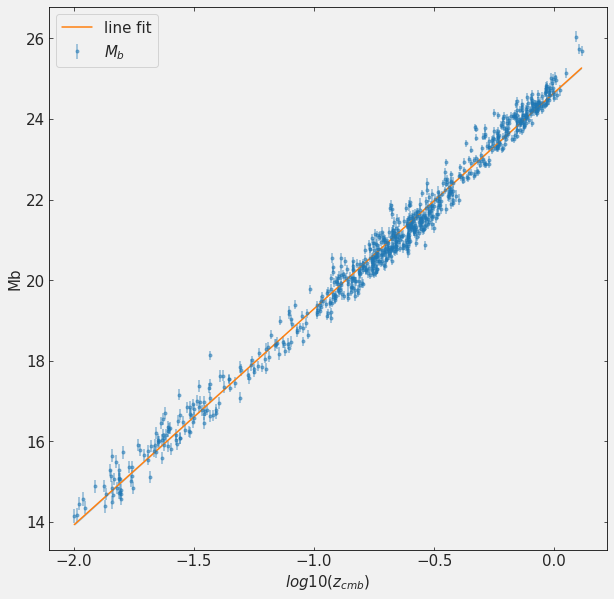

In [56]:
#delete leave plot
ax = pl.figure(figsize=(10,10)).add_subplot(111)
ax.errorbar(np.log10(jla.zcmb[sorter]), jla.mb[sorter], yerr = jla.dmb[sorter], fmt = ".", alpha=0.5, label=r"$M_b$")
ax.plot(np.log10(jla.zcmb[sorter]), line(np.log10(jla.zcmb[sorter]), popt0[0], popt0[1]), 
        "-", label="line fit")

ax.fill_between(np.log10(jla.zcmb[sorter]), 
                line(np.log10(jla.zcmb[sorter]), popt0[0] + pcov0[0][0]**0.5, popt0[1] + pcov0[1][1]**0.5),
                line(np.log10(jla.zcmb[sorter]), popt0[0] - pcov0[0][0]**0.5, popt0[1] - pcov0[1][1]**0.5), alpha=0.5b)

ax.set_ylabel("Mb")
ax.set_xlabel(r"$log10(z_{cmb})$");
pl.legend();

Figure 3: Apparent b-band magnitude against redshift (derived from CMB) of the "JLA"  combined dataset. The organe line is a line fit to the data disregariding uncertainties. The uncertainty band around the fit is plotted, but it is not visible as it is very narrow. 

In [70]:
print ("line model - with uncertainties")
popt1, pcov1 = sp.optimize.curve_fit(line, np.log10(jla.zcmb), jla.mb, 
                                   sigma=jla.dmb, p0=[5, 0])
print("slope = {:.2} +/- {:.2}".format(popt1[0], np.sqrt(pcov1[0,0])))
print("intercept = {:.2} +/- {:.2}".format(popt1[1], np.sqrt(pcov1[1,1])))
print("parameters covariance = {:.2}".format(pcov1[1,0]))

line model - with uncertainties
slope = 5.4 +/- 0.025
intercept = 2.5e+01 +/- 0.018
parameters covariance = 0.00036


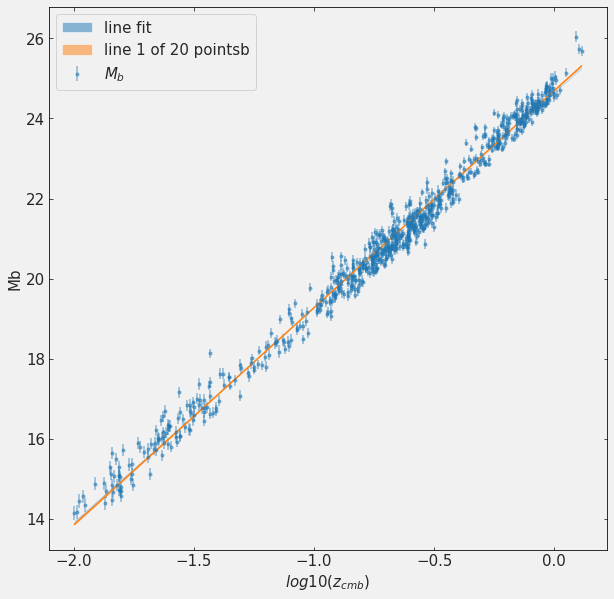

In [63]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
ax.errorbar(np.log10(jla.zcmb[sorter]), jla.mb[sorter], yerr = jla.dmb[sorter], fmt = ".", alpha=0.5, label=r"$M_b$")
ax.plot(np.log10(jla.zcmb[sorter]), line(np.log10(jla.zcmb[sorter]), popt1[0], popt1[1]), 
        "-")

ax.fill_between(np.log10(jla.zcmb[sorter]), 
                line(np.log10(jla.zcmb[sorter]), popt0[0] + pcov0[0][0]**0.5, 
                     popt0[1] + pcov0[1][1]**0.5),
                line(np.log10(jla.zcmb[sorter]), popt0[0] - pcov0[0][0]**0.5, 
                     popt0[1] - pcov0[1][1]**0.5), alpha=0.5, label="line fit")

ax.fill_between(np.log10(jla.zcmb[sorter]), 
                line(np.log10(jla.zcmb[sorter]), popt1[0] + pcov1[0][0]**0.5, 
                     popt1[1] + pcov1[1][1]**0.5),
                line(np.log10(jla.zcmb[sorter]), popt1[0] - pcov1[0][0]**0.5, 
                     popt1[1] - pcov1[1][1]**0.5), alpha=0.5, label="line 1 of 20 pointsb")
ax.set_ylabel("Mb")
ax.set_xlabel(r"$log10(z_{cmb})$");
pl.legend();

Figure 4: As figure 3 but the fit is a line fit with the uncertainties used as weights in a stnrard weighted least square fit

Compare the *model* values and uncertainty you obtained by fitting the model with and without including the uncertainties on the y values.  Comment on your findings.

The fit parameters are the same within the uncertainties in both the model that uses the uncertainties and the model that disregards them

Fit the data using only 1 every 20 points - use this: https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array

Comment and plot the new model and its uncertainty band

In [67]:
print ("data-starved model")
popt, pcov = sp.optimize.curve_fit(line, np.log10(jla.zcmb)[::20], 
                                   jla.mb[::20], sigma = jla.dmb[::20] * 10, p0=[5, 0])
print("slope = {:.2} +/- {:.2}".format(popt[0], np.sqrt(pcov[0,0])))
print("intercept = {:.2} +/- {:.2}".format(popt[1], np.sqrt(pcov[1,1])))
print("parameters covariance = {:.2}".format(pcov[1,0]))

data-starved model
slope = 5.5 +/- 0.11
intercept = 2.5e+01 +/- 0.076
parameters covariance = 0.0067


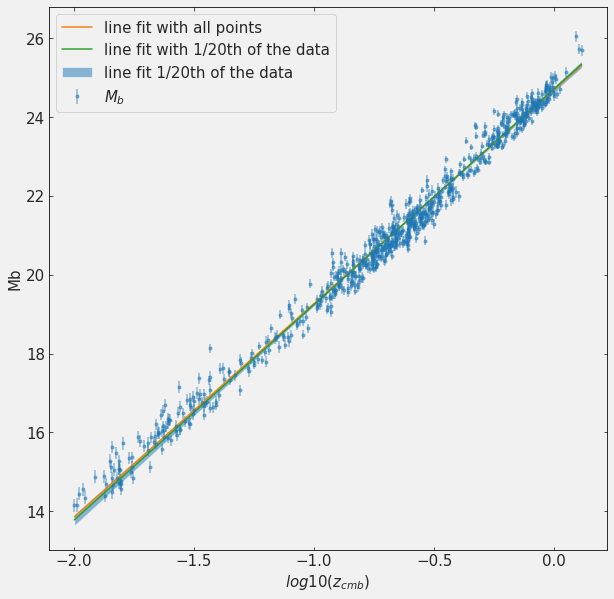

In [62]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
ax.errorbar(np.log10(jla.zcmb[sorter]), jla.mb[sorter], yerr = jla.dmb[sorter], 
            fmt = ".", alpha=0.5, label=r"$M_b$")
ax.plot(np.log10(jla.zcmb[sorter]), line(np.log10(jla.zcmb[sorter]), popt1[0], popt1[1]), 
        "-", label=r"line fit with all points")
ax.plot(np.log10(jla.zcmb[sorter]), line(np.log10(jla.zcmb[sorter]), popt[0], popt[1]), 
        "-", label=r"line fit with 1/20th of the data")

ax.fill_between(np.log10(jla.zcmb[sorter]), 
                line(np.log10(jla.zcmb[sorter]), popt[0] + pcov[0][0]**0.5, popt[1] + pcov[1][1]**0.5),
                line(np.log10(jla.zcmb[sorter]), popt[0] - pcov[0][0]**0.5, popt[1] - pcov[1][1]**0.5), 
                alpha=0.5, label="line fit 1/20th of the data")

ax.set_ylabel("Mb")
ax.set_xlabel(r"$log10(z_{cmb})$");
pl.legend();

Figure 5: as figure 3 and 4 but fitting one out of 20 points. The uncertainty in the fit parameters is not visible as a band around the fit line. Nonetheless, the parameters of the fit are consistent with the previous models within the uncertainties.




# Fit a quadratic equation

Use the same function to fit a quadratic equation to the data. 
the equation is below

You can use curvefit to get fit this data. Plot your data, your original model which included uncertainties, and the current quadratic model


In [0]:
def quad(x, a, b, c):
    '''Quadratic equation
    Input:
    x: array-like, the exogenous variable
    a: parameters of the quadratic term
    b: parameter of the linear term
    c: intercept
    
    '''
    return a * x**2 + b * x + c


In [75]:
print ("quadratic model")
popt2, pcov2 = sp.optimize.curve_fit(quad, np.log10(jla.zcmb), 
                                   jla.mb, 
                                   sigma = jla.dmb, p0=[5, 0, 0])
print("fit parameters", popt2)
print("covariance\n", pcov2)

quadratic model
fit parameters [ 0.34823126  5.98460064 24.83923107]
covariance
 [[0.00172315 0.00276417 0.00070818]
 [0.00276417 0.00498621 0.00146466]
 [0.00070818 0.00146466 0.00059134]]


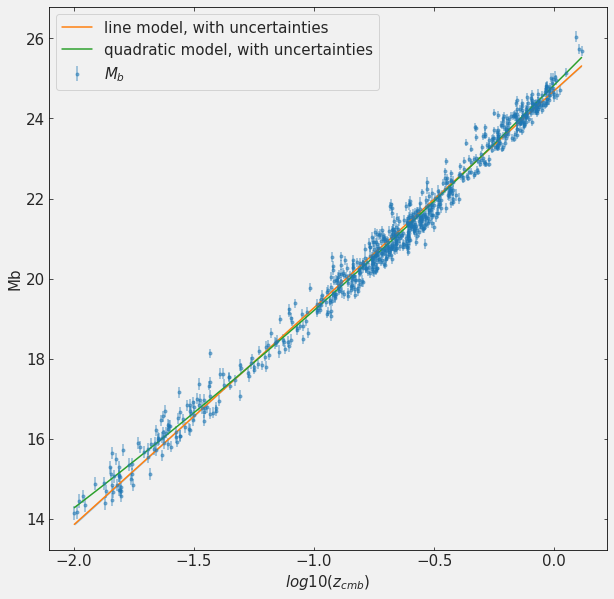

In [79]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
ax.errorbar(np.log10(jla.zcmb[sorter]), jla.mb[sorter], yerr = jla.dmb[sorter], 
            fmt = ".", alpha=0.5, label=r"$M_b$")
ax.plot(np.log10(jla.zcmb[sorter]), line(np.log10(jla.zcmb[sorter]), 
                                         popt1[0], popt1[1]), 
        "-", label=r"line model, with uncertainties")

ax.fill_between(np.log10(jla.zcmb[sorter]), 
                line(np.log10(jla.zcmb[sorter]), popt1[0] + pcov1[0][0]**0.5, 
                     popt1[1] + pcov1[1][1]**0.5),
                line(np.log10(jla.zcmb[sorter]), popt1[0] - pcov1[0][0]**0.5, 
                     popt1[1] - pcov1[1][1]**0.5), alpha=0.5,)


ax.plot(np.log10(jla.zcmb[sorter]), 
                quad(np.log10(jla.zcmb[sorter]), 
                     popt2[0], popt2[1], popt2[2]), 
                     label="quadratic model, with uncertainties") 
                     

ax.set_ylabel("Mb")
ax.set_xlabel(r"$log10(z_{cmb})$");
pl.legend();

Figure 6: as figure 3 showing both the line fit and the quadratic fit, with uncertanities.

# Now fit the data with sklearn 
like we did in class (lab 5): create a regressor linear model and fit the data to it. Predict the y values based on the inout data. 

In [0]:
regr = skl.linear_model.LinearRegression()

In [0]:
regr.fit(np.atleast_2d(np.log10(jla.zcmb)).T, jla.mb)
ymodel = regr.predict(np.atleast_2d(np.log10(jla.zcmb)).T)


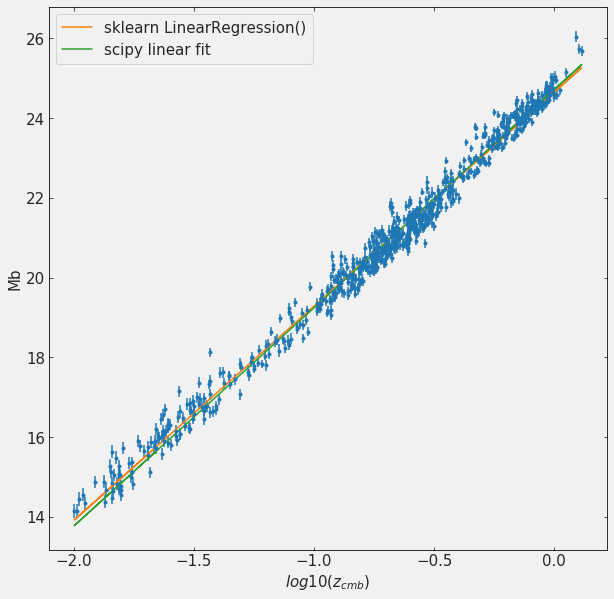

In [84]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
pl.errorbar(np.log10(jla.zcmb), jla.mb, yerr = jla.dmb, fmt = ".")
pl.xlabel("X-values")
pl.ylabel("Y-values");
pl.plot(np.log10(jla.zcmb), ymodel, '-', label="sklearn LinearRegression()")
pl.plot(np.log10(jla.zcmb), line(np.log10(jla.zcmb), popt[0], popt[1]), 
        "-", label="scipy linear fit")

pl.fill_between(np.log10(jla.zcmb)[sorter], 
                line(np.log10(jla.zcmb)[sorter], popt0[0] + pcov0[0][0]**0.5, 
                     popt0[1] + pcov0[1][1]**0.5),
                line(np.log10(jla.zcmb)[sorter], popt0[0] - pcov0[0][0]**0.5, 
                     popt0[1] - pcov0[1][1]**0.5), alpha=0.5)
ax.set_ylabel("Mb")
ax.set_xlabel(r"$log10(z_{cmb})$");
pl.legend();

Figure 7: as figure 3 showing both the line fits generated with scipy and with sklearn, no uncertinties

# Cross valudation: Split your data into a training and test set
this is the "signature" of the machine learning approach. While this can be done using simply a random number generator
(see example)

do it using the sklear capabilities: ```skl.model_selection.train_test_split```. Read abnout the ```stratify``` funcionality of this method: it allows you to create unbiased train-test samples. In this case it is not necessary but it may be useful in your future!


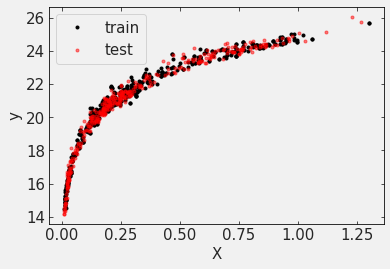

In [86]:
Nall = len(jla)
Ntrain = int(Nall * 0.75)
train = numpy.random.randint(0, high=Nall, size=Ntrain)
test = np.setdiff1d(np.arange(Nall), train)
X_train, y_train = jla.zcmb[train], jla.mb[train]
X_test, y_test = jla.zcmb[test], jla.mb[test]
pl.plot(X_train, y_train, 'k.', label="train")
pl.plot(X_test, y_test, 'r.', alpha=0.5, label="test")
pl.xlabel("X")
pl.ylabel("y")
pl.legend()

Figure 8: same as figure 1 but with SNe color coded by wheather an object falls in the training (black, 75% of the data) or test (red, 25%) data split for sklearn regression.

In [0]:
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(
    np.atleast_2d(np.log10(jla.zcmb)).T, jla.mb, test_size=0.50, random_state=123)

Plot the data and the new model but colorcode the data based on the training or test set (instead othe survey it comes from like you had done before)

Text(0, 0.5, 'log10(z_cmb)')

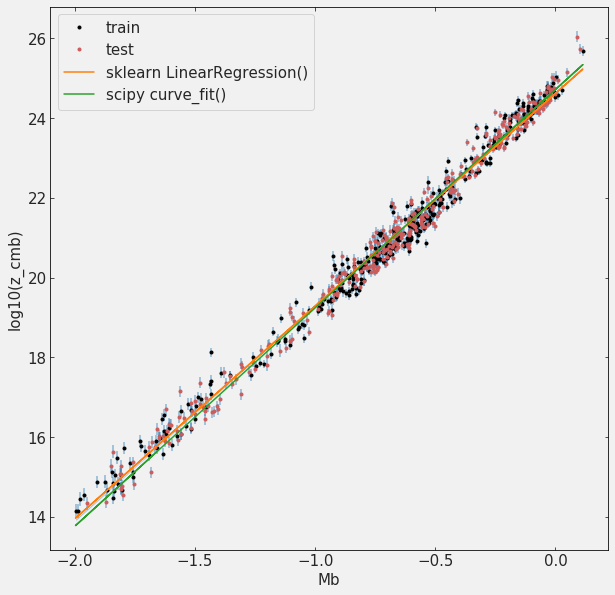

In [88]:
regr.fit(X_train, y_train)
ymodel = regr.predict(X_train)
ax = pl.figure(figsize=(10,10)).add_subplot(111)
pl.errorbar(np.log10(jla.zcmb), jla.mb, yerr = jla.dmb, 
            fmt = ".", ms = 0, alpha=0.5)
pl.plot(X_train.flatten(), y_train,  "k.", label="train")
pl.plot(X_test.flatten(), y_test,  ".", color="IndianRed", label="test")
pl.plot(X_train, ymodel, '-', label="sklearn LinearRegression()")
pl.plot(np.log10(jla.zcmb), line(np.log10(jla.zcmb), popt[0], popt[1]), 
        "-", label="scipy weighted least square")

pl.fill_between(np.log10(jla.zcmb)[sorter], 
                line(np.log10(jla.zcmb)[sorter], popt0[0] + pcov0[0][0]**0.5, 
                     popt0[1] + pcov0[1][1]**0.5),
                line(np.log10(jla.zcmb)[sorter], popt0[0] - pcov0[0][0]**0.5, 
                     popt0[1] - pcov0[1][1]**0.5), alpha=0.5)
pl.legend()
pl.xlabel("Mb")
pl.ylabel("log10(z_cmb)")

Figure 8: same as figure 3 but with SNe color coded by wheather an object falls in the training (black, 75% of the data) or test (red, 25%) data split for sklearn regression andshowing a line fit for scipy and sklearn orinary least square

Calculate the scores of the train and test set. Make considerations about the quality of the model including how robust it is.

In [91]:
print("training score")
np.round(regr.score(X_train, y_train), 5)

training score


0.98704

In [92]:
print("test score")
np.round(regr.score(X_test, y_test), 5)

test score


0.98784

the test and training scores are comparable, indicating the model is effevtive (R^2~1) and it is not overfitting the data